In [2]:
#kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt #görselleştirme için
from sklearn import model_selection
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn import metrics

In [3]:
#veriyukleme
data_csv = r"D:\Masaüstü\ÜNİ\3_1\3.1_Projeler\Makine öğrenmesine giriş\machine\numeric.csv"
data = pd.read_csv(data_csv)
print(data)

     ilan   fiyati  sahip  yer  oda  balkon  yorum puanı  konum puanı  \
0     132  245.000    203   19    0       0         4.58          5.0   
1     207  324.000    152    8    0       0         4.66          4.8   
2     318  530.000    202   28    0       1         4.89          4.9   
3     326  348.000    219   28    0       1         4.45          4.3   
4     107  817.000    230   13    0       1         4.86          4.8   
..    ...      ...    ...  ...  ...     ...          ...          ...   
347   122    1.423     12   26    2       1         4.83          4.8   
348   219    1.404     30   26    5       1         5.00          4.9   
349     1  593.000     72    6    2       1         5.00          5.0   
350   335  950.000    111    6    1       1         4.90          4.8   
351   126  482.000      1    6    0       1         4.90          4.8   

     süper ev sahibi  değerlendirme sayısı  son değerlendirme  misafir  \
0                  0                    49       

In [4]:
X = data.drop(["fiyati","ilan","sahip","değerlendirme sayısı","son değerlendirme"], axis = 1 ) #ilan adı ve ev sahibi etkilemesin.
y = data["fiyati"]
print(X)
print(y)

     yer  oda  balkon  yorum puanı  konum puanı  süper ev sahibi  misafir  \
0     19    0       0         4.58          5.0                0        2   
1      8    0       0         4.66          4.8                0        3   
2     28    0       1         4.89          4.9                1        3   
3     28    0       1         4.45          4.3                0        2   
4     13    0       1         4.86          4.8                1        3   
..   ...  ...     ...          ...          ...              ...      ...   
347   26    2       1         4.83          4.8                0        4   
348   26    5       1         5.00          4.9                1       10   
349    6    2       1         5.00          5.0                0        4   
350    6    1       1         4.90          4.8                1        3   
351    6    0       1         4.90          4.8                1        3   

     temizlik  
0         4.4  
1         4.5  
2         4.8  
3         4

In [5]:
#♠verilerin train ve test kümesi olarak ayrılması.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=100) #en yüksek test_size ve random_state


In [6]:
#eğitim modeli
xgb_model = XGBClassifier()
model = xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

C:\Users\BUKET\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:29:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [7]:
#grafiğimizi düzgün alabilmek için index numaralarına göre sıralattık.
X_train = X_train.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

In [12]:
#sonuçlar
import math
from sklearn.metrics import mean_squared_error

print("------------------------------")
print("XGBoost r^2 degeri")
print("------------------------------")
print(r2_score(y_train,xgb_model.predict(X_train)))
print("------------------------------")
print("XGBoost RMSE degeri")#Root Mean Square Error(RMSE)
print("------------------------------")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("------------------------------")

------------------------------
XGBoost r^2 degeri
------------------------------
0.37823957530477936
------------------------------
XGBoost RMSE degeri
------------------------------
292.12977988001916
------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

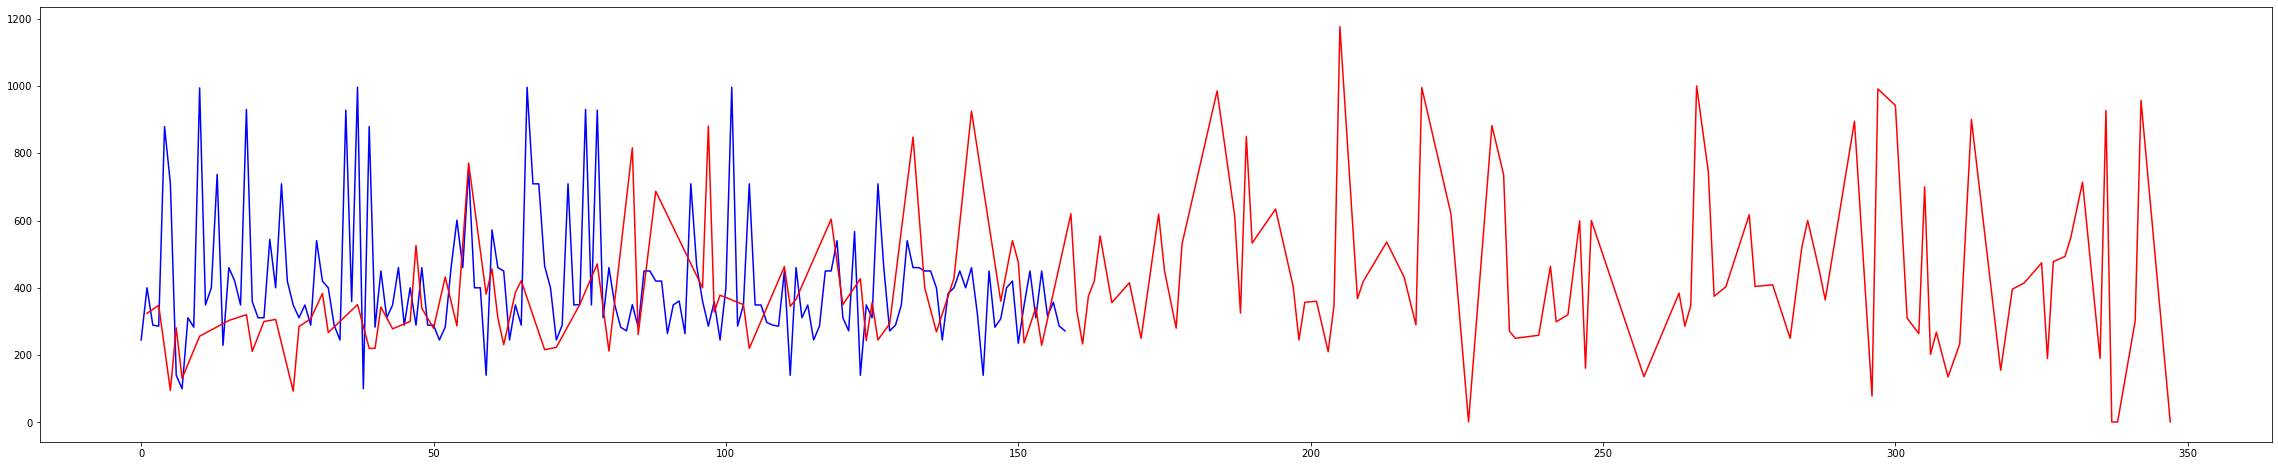

In [13]:
plt.figure(figsize=(40,8))
#plt.scatter(y_test,y_pred,color='r')
plt.plot(y_pred,color='blue')
plt.plot(y_test,color='r')

plt.show